# Webscraping
Collecting data directly from a website

Limitations - You cannot use this method if website does not allow to scrape

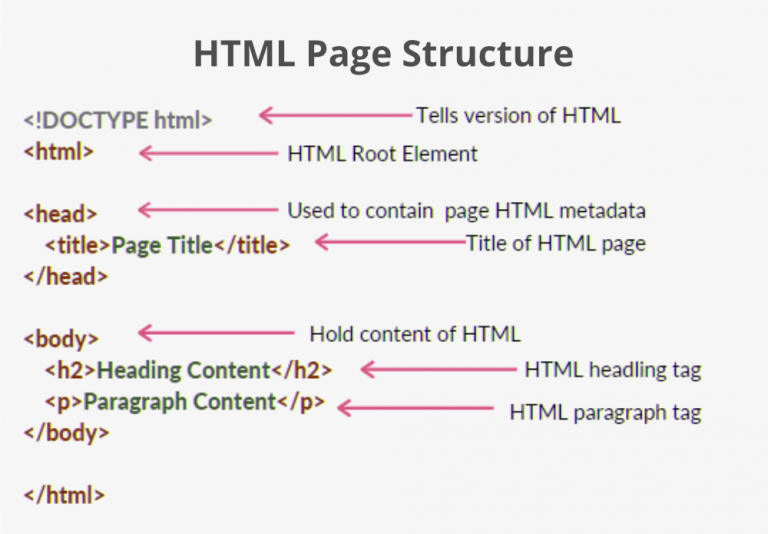

# Get the html content
requests

In [1]:
url = "https://en.wikipedia.org/wiki/World_population"
print(url)

https://en.wikipedia.org/wiki/World_population


In [2]:
import requests

response = requests.get(url)
response

<Response [200]>

# Response 200 means ok , You can go ahead for webscraping

In [4]:
html_content = response.content
print(html_content[0:100])

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-la'


# Create a beautiful soup to fetch particular elements of page

In [6]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html_content)

In [7]:
type(soup)

bs4.BeautifulSoup

# Get the title of webpage

In [8]:
page_tile = soup.find("title")
page_tile

<title>World population - Wikipedia</title>

In [10]:
page_tile.get_text()

'World population - Wikipedia'

In [11]:
page_tile.text

'World population - Wikipedia'

# Fetch the h1 tag

In [12]:
h1_tag = soup.find("h1", class_="firstHeading")
h1_tag

<h1 class="firstHeading mw-first-heading" id="firstHeading"><span class="mw-page-title-main">World population</span></h1>

In [13]:
h1_tag.text

'World population'

# Get subtitles from div page

In [15]:
subtitle_tags = soup.find_all("div", class_="mw-heading")
subtitle_tags

[<div class="mw-heading mw-heading2"><h2 id="History">History</h2></div>,
 <div class="mw-heading mw-heading3"><h3 id="Prehistoric_patterns">Prehistoric patterns</h3></div>,
 <div class="mw-heading mw-heading3"><h3 id="Ancient_and_post-classical_history">Ancient and post-classical history</h3></div>,
 <div class="mw-heading mw-heading3"><h3 id="Modern_history">Modern history</h3></div>,
 <div class="mw-heading mw-heading3"><h3 id="20th_century">20th century</h3></div>,
 <div class="mw-heading mw-heading3"><h3 id="Milestones_by_the_billions">Milestones by the billions</h3></div>,
 <div class="mw-heading mw-heading2"><h2 id="Global_demographics">Global demographics</h2></div>,
 <div class="mw-heading mw-heading2"><h2 id="Population_by_region">Population by region</h2></div>,
 <div class="mw-heading mw-heading2"><h2 id="Largest_populations_by_country">Largest populations by country</h2></div>,
 <div class="mw-heading mw-heading3"><h3 id="Ten_most_populous_countries">Ten most populous coun

In [16]:
subtitle_tags[0].text

'History'

In [17]:
subtitles = [tag.text for tag in subtitle_tags]
subtitles

['History',
 'Prehistoric patterns',
 'Ancient and post-classical history',
 'Modern history',
 '20th century',
 'Milestones by the billions',
 'Global demographics',
 'Population by region',
 'Largest populations by country',
 'Ten most populous countries',
 'Most densely populated countries',
 'Fluctuation',
 'Annual population growth',
 'Population growth by region',
 'Past population',
 'Projections',
 'Mathematical approximations',
 'Years for world population to double',
 'Number of humans who have ever lived',
 'Human population as a function of food availability',
 'See also',
 'Explanatory notes',
 'References',
 'Citations',
 'General and cited sources',
 'Further reading',
 'External links']

# Get all image links

In [18]:
image_tags = soup.find_all("a", class_="mw-file-description")
image_tags

[<a class="mw-file-description" href="/wiki/File:World_Population_Prospects.svg"><img class="mw-file-element" data-file-height="676" data-file-width="900" decoding="async" height="263" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/0e/World_Population_Prospects.svg/500px-World_Population_Prospects.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/0e/World_Population_Prospects.svg/525px-World_Population_Prospects.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/0/0e/World_Population_Prospects.svg/700px-World_Population_Prospects.svg.png 2x" width="350"/></a>,
 <a class="mw-file-description" href="/wiki/File:Illustration_of_contemporary_and_past_human_populations_Our_World_in_Data.png"><img class="mw-file-element" data-file-height="7747" data-file-width="5201" decoding="async" height="447" src="//upload.wikimedia.org/wikipedia/commons/thumb/d/d2/Illustration_of_contemporary_and_past_human_populations_Our_World_in_Data.png/330px-Illustration_of_contempor

In [20]:
image_tags[0]

<a class="mw-file-description" href="/wiki/File:World_Population_Prospects.svg"><img class="mw-file-element" data-file-height="676" data-file-width="900" decoding="async" height="263" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/0e/World_Population_Prospects.svg/500px-World_Population_Prospects.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/0e/World_Population_Prospects.svg/525px-World_Population_Prospects.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/0/0e/World_Population_Prospects.svg/700px-World_Population_Prospects.svg.png 2x" width="350"/></a>

In [21]:
image_tags[0].get("href")

'/wiki/File:World_Population_Prospects.svg'

In [22]:
home_page = "https://en.wikipedia.org"

In [23]:
home_page + image_tags[0].get("href")

'https://en.wikipedia.org/wiki/File:World_Population_Prospects.svg'

In [24]:
image_links = [home_page + tag.get("href") for tag in image_tags]
image_links

['https://en.wikipedia.org/wiki/File:World_Population_Prospects.svg',
 'https://en.wikipedia.org/wiki/File:Illustration_of_contemporary_and_past_human_populations_Our_World_in_Data.png',
 'https://en.wikipedia.org/wiki/File:2020_1million_cities.jpg',
 'https://en.wikipedia.org/wiki/File:Expectancy_of_life.svg',
 'https://en.wikipedia.org/wiki/File:Population_pyramid_of_the_world_in_continental_groupings_2023.svg',
 'https://en.wikipedia.org/wiki/File:Global_population_cartogram.png',
 'https://en.wikipedia.org/wiki/File:People%27s_-Km%C2%B2_for_all_countries_(and_us_states,_uk_kingdoms).png',
 'https://en.wikipedia.org/wiki/File:Top_5_Country_Population_Graph_1901_to_2021.svg',
 'https://en.wikipedia.org/wiki/File:Population_Density,_v4.11,_2020_(48009093621).jpg',
 'https://en.wikipedia.org/wiki/File:World_population_(UN).svg',
 'https://en.wikipedia.org/wiki/File:Total_Fertility_Rate_Map_by_Country.svg',
 'https://en.wikipedia.org/wiki/File:World_population_counter,_Eureka,_Halifax,_

# Fetch the tables and load as dataframe

In [26]:
table_tags = soup.find_all("table", class_="wikitable")
table_tags

[<table class="wikitable" style="text-align:center; float:right; clear:right; margin-left:8px; margin-right:0;">
 <caption>World population milestones in billions<sup class="reference" id="cite_ref-:6_61-0"><a href="#cite_note-:6-61"><span class="cite-bracket">[</span>61<span class="cite-bracket">]</span></a></sup> (Worldometers estimates)
 </caption>
 <tbody><tr>
 <th scope="row">Population
 </th>
 <th scope="col">1
 </th>
 <th scope="col">2
 </th>
 <th scope="col">3
 </th>
 <th scope="col">4
 </th>
 <th scope="col">5
 </th>
 <th scope="col">6
 </th>
 <th scope="col">7
 </th>
 <th scope="col">8
 </th>
 <th scope="col">9
 </th>
 <th scope="col">10
 </th></tr>
 <tr>
 <th scope="row">Year
 </th>
 <td>1804</td>
 <td>1927</td>
 <td>1960</td>
 <td>1974</td>
 <td>1987</td>
 <td>1999</td>
 <td>2011</td>
 <td>2022</td>
 <td><i>2037</i></td>
 <td><i>2057</i>
 </td></tr>
 <tr>
 <th scope="row">Years elapsed
 </th>
 <td>200,000+</td>
 <td>123</td>
 <td>33</td>
 <td>14</td>
 <td>13</td>
 <td>12</t

In [27]:
table_tags[0]

<table class="wikitable" style="text-align:center; float:right; clear:right; margin-left:8px; margin-right:0;">
<caption>World population milestones in billions<sup class="reference" id="cite_ref-:6_61-0"><a href="#cite_note-:6-61"><span class="cite-bracket">[</span>61<span class="cite-bracket">]</span></a></sup> (Worldometers estimates)
</caption>
<tbody><tr>
<th scope="row">Population
</th>
<th scope="col">1
</th>
<th scope="col">2
</th>
<th scope="col">3
</th>
<th scope="col">4
</th>
<th scope="col">5
</th>
<th scope="col">6
</th>
<th scope="col">7
</th>
<th scope="col">8
</th>
<th scope="col">9
</th>
<th scope="col">10
</th></tr>
<tr>
<th scope="row">Year
</th>
<td>1804</td>
<td>1927</td>
<td>1960</td>
<td>1974</td>
<td>1987</td>
<td>1999</td>
<td>2011</td>
<td>2022</td>
<td><i>2037</i></td>
<td><i>2057</i>
</td></tr>
<tr>
<th scope="row">Years elapsed
</th>
<td>200,000+</td>
<td>123</td>
<td>33</td>
<td>14</td>
<td>13</td>
<td>12</td>
<td>12</td>
<td>11</td>
<td><i>15</i></td>
<td

In [29]:
!uv add lxml

Resolved 117 packages in 5.50s
Prepared 1 package in 1.68s
Installed 1 package in 641ms
 + lxml==6.0.0


In [32]:
# Convert to string
table_0 = str(table_tags[0])

# Convert string to binary
import io

table_binary = io.StringIO(table_0)

# Load the table as dataframe
import pandas as pd

df0 = pd.read_html(table_binary)[0]
df0

,Population,1,2,3,4,5,6,7,8,9,10
0,Year,1804,1927,1960,1974,1987,1999,2011,2022,2037,2057
1,Years elapsed,"200,000+",123,33,14,13,12,12,11,15,20


In [33]:
df0.to_csv("WorldPopulation.csv", index=False)

# Save all tables in a list

In [34]:
dfs = []

for tag in table_tags:
    string_tag = str(tag)
    binary_tag = io.StringIO(string_tag)
    a = pd.read_html(binary_tag)[0]
    display(a)
    dfs.append(a)

,Population,1,2,3,4,5,6,7,8,9,10
0,Year,1804,1927,1960,1974,1987,1999,2011,2022,2037,2057
1,Years elapsed,"200,000+",123,33,14,13,12,12,11,15,20


,Region,2022 (percent),2030 (percent),2050 (percent)
0,Sub-Saharan Africa,"1,152 (14.51%)","1,401 (16.46%)","2,094 (21.62%)"
1,Northern Africa and Western Asia,549 (6.91%),617 (7.25%),771 (7.96%)
2,Central Asia and Southern Asia,"2,075 (26.13%)","2,248 (26.41%)","2,575 (26.58%)"
3,Eastern Asia and Southeastern Asia,"2,342 (29.49%)","2,372 (27.87%)","2,317 (23.92%)"
4,Europe and Northern America,"1,120 (14.10%)","1,129 (13.26%)","1,125 (11.61%)"
5,Latin America and the Caribbean,658 (8.29%),695 (8.17%),749 (7.73%)
6,Australia and New Zealand,31 (0.39%),34 (0.40%),38 (0.39%)
7,Oceania,14 (0.18%),15 (0.18%),20 (0.21%)
8,World,7942,8512,9687


,Region,Density (inhabitants/km2),Population (millions),Most populous country,Most populous city (metropolitan area)
0,Asia,104.1,4641,"1,439,090,595 – India","13,515,000 – Tokyo Metropolis (37,400,000 – Gr..."
1,Africa,44.4,1340,"0,211,401,000 – Nigeria","09,500,000 – Cairo (20,076,000 – Greater Cairo)"
2,Europe,73.4,747,"0,146,171,000 – Russia, approx. 110 million in...","13,200,000 – Moscow (20,004,000 – Moscow metro..."
3,Latin America,24.1,653,"0,214,103,000 – Brazil","12,252,000 – São Paulo City (21,650,000 – São ..."
4,Northern America[note 1],14.9,368,"0,332,909,000 – United States","08,804,000 – New York City (23,582,649 – New Y..."
5,Oceania,5,42,"0,025,917,000 – Australia","05,367,000 – Sydney"
6,Antarctica,~0,0.004[89],N/A[note 2],"00,001,258 – McMurdo Station"


,Country / Dependency,Population,% of world,Date,Source (official or from the United Nations)
0,India,1425775850,17.4%,14 Apr 2023,UN projection[92]
1,China,1409670000,17.2%,17 Jan 2024,National annual estimate[93]
2,United States,338120533,4.13%,17 Jul 2025,National population clock[94]
3,Indonesia,278696200,3.40%,1 Jul 2023,National annual estimate[95]
4,Pakistan,229488994,2.80%,1 Jul 2022,UN projection[96]
5,Nigeria,216746934,2.65%,1 Jul 2022,UN projection[96]
6,Brazil,219430942,2.68%,17 Jul 2025,National population clock[97]
7,Bangladesh,168220000,2.05%,1 Jul 2020,Annual Population Estimate[98]
8,Russia,147190000,1.80%,1 Oct 2021,2021 preliminary census results[99]
9,Mexico,128271248,1.57%,31 Mar 2022,NaN


,#,Most populous countries,2000,2015,2030[A],Y axisX axis0300600900120015001800200020152030ChinaIndiaUnited StatesIndonesiaPakistanBrazilNigeriaBangladeshRussiaMexicoTen most populous countries raw data
,Y axisX axis0300600900120015001800200020152030ChinaIndiaUnited StatesIndonesiaPakistanBrazilNigeriaBangladeshRussiaMexicoTen most populous countries raw data,Unnamed: 1_level_1,Unnamed: 2_level_1,Unnamed: 3_level_1,Unnamed: 4_level_1,Unnamed: 5_level_1
,Y axisX axis0300600900120015001800200020152030ChinaIndiaUnited StatesIndonesiaPakistanBrazilNigeriaBangladeshRussiaMexicoTen most populous countries raw data,Unnamed: 1_level_2,Unnamed: 2_level_2,Unnamed: 3_level_2,Unnamed: 4_level_2,Unnamed: 5_level_2
,Y axisX axis0300600900120015001800200020152030ChinaIndiaUnited StatesIndonesiaPakistanBrazilNigeriaBangladeshRussiaMexicoTen most populous countries raw data,Unnamed: 1_level_3,Unnamed: 2_level_3,Unnamed: 3_level_3,Unnamed: 4_level_3,Unnamed: 5_level_3
,Y axisX axis0300600900120015001800200020152030ChinaIndiaUnited StatesIndonesiaPakistanBrazilNigeriaBangladeshRussiaMexicoTen most populous countries raw data,Unnamed: 1_level_4,Unnamed: 2_level_4,Unnamed: 3_level_4,Unnamed: 4_level_4,Unnamed: 5_level_4
,Y axisX axis0300600900120015001800200020152030ChinaIndiaUnited StatesIndonesiaPakistanBrazilNigeriaBangladeshRussiaMexicoTen most populous countries raw data,Unnamed: 1_level_5,Unnamed: 2_level_5,Unnamed: 3_level_5,Unnamed: 4_level_5,Unnamed: 5_level_5
,Y axisX axis0300600900120015001800200020152030ChinaIndiaUnited StatesIndonesiaPakistanBrazilNigeriaBangladeshRussiaMexicoTen most populous countries raw data,Unnamed: 1_level_6,Unnamed: 2_level_6,Unnamed: 3_level_6,Unnamed: 4_level_6,Unnamed: 5_level_6
,Y axisX axis0300600900120015001800200020152030ChinaIndiaUnited StatesIndonesiaPakistanBrazilNigeriaBangladeshRussiaMexicoTen most populous countries raw data,Unnamed: 1_level_7,Unnamed: 2_level_7,Unnamed: 3_level_7,Unnamed: 4_level_7,Unnamed: 5_level_7
,Y axisX axis0300600900120015001800200020152030ChinaIndiaUnited StatesIndonesiaPakistanBrazilNigeriaBangladeshRussiaMexicoTen most populous countries raw data,Unnamed: 1_level_8,Unnamed: 2_level_8,Unnamed: 3_level_8,Unnamed: 4_level_8,Unnamed: 5_level_8
,Y axisX axis0300600900120015001800200020152030ChinaIndiaUnited StatesIndonesiaPakistanBrazilNigeriaBangladeshRussiaMexicoTen most populous countries raw data,Unnamed: 1_level_9,Unnamed: 2_level_9,Unnamed: 3_level_9,Unnamed: 4_level_9,Unnamed: 5_level_9
,Y axisX axis0300600900120015001800200020152030ChinaIndiaUnited StatesIndonesiaPakistanBrazilNigeriaBangladeshRussiaMexicoTen most populous countries raw data,Unnamed: 1_level_10,Unnamed: 2_level_10,Unnamed: 3_level_10,Unnamed: 4_level_10,Unnamed: 5_level_10


,Rank,Country,Population,Area (km2),Density (pop/km2)
0,1,Singapore,5921231,719,8235
1,2,Bangladesh,165650475,148460,1116
2,3,Palestine[note 3][102],5223000,6025,867
3,4,Taiwan[note 4],23580712,35980,655
4,5,South Korea,51844834,99720,520
5,6,Lebanon,5296814,10400,509
6,7,Rwanda,13173730,26338,500
7,8,Burundi,12696478,27830,456
8,9,Israel,9402617,21937,429
9,10,India,1389637446,3287263,423


,Rank,Country,Population,Area (km2),Density (pop/km2),Population trend[citation needed]
0,1,India,1389637446,3287263,423,Growing
1,2,Pakistan,242923845,796095,305,Rapidly growing
2,3,Bangladesh,165650475,148460,1116,Growing
3,4,Japan,124214766,377915,329,Declining[103]
4,5,Philippines,114597229,300000,382,Growing
5,6,Vietnam,103808319,331210,313,Growing
6,7,United Kingdom,67791400,243610,278,Growing
7,8,South Korea,51844834,99720,520,Steady
8,9,Taiwan,23580712,35980,655,Steady
9,10,Sri Lanka,23187516,65610,353,Growing


Year  Population Yearly growth           Density (pop/km2)
    Year  Population             %    Number Density (pop/km2)
0   1951  2543130380         1.75%  43808223                17
1   1952  2590270899         1.85%  47140519                17
2   1953  2640278797         1.93%  50007898                18
3   1954  2691979339         1.96%  51700542                18
4   1955  2746072141         2.01%  54092802                18
..   ...         ...           ...       ...               ...
68  2019  7764951032         1.06%  81161204                52
69  2020  7840952880         0.98%  76001848                53
70  2021  7909295151         0.87%  68342271                53
71  2022  7975105156         0.83%  65810005                54
72  2023  8045311447         0.88%  70206291                54

[73 rows x 5 columns]

,Region,1500,1600,1700,1750,1800,1850,1900,1950,1999,2008,2010,2012,2050,2150
0,World,585,660,710,791,978,1262,1650,2521,6008,6707,6896,7052,9725,9746
1,Africa,86,114,106,106,107,111,133,221,783,973,1022,1052,2478,2308
2,Asia,282,350,411,502,635,809,947,1402,3700,4054,4164,4250,5267,5561
3,Europe,168,170,178,190,203,276,408,547,675,732,738,740,734,517
4,Latin America[Note 1],40,20,10,16,24,38,74,167,508,577,590,603,784,912
5,Northern America[Note 1],6,3,2,2,7,26,82,172,312,337,345,351,433,398
6,Oceania,3,3,3,2,2,2,6,13,30,34,37,38,57,51


,Region,1500,1600,1700,1750,1800,1850,1900,1950,1999,2008,2010,2012,2050,2150
0,Africa,14.7,17.3,14.9,13.4,10.9,8.8,8.1,8.8,13.0,14.5,14.8,15.2,25.5,23.7
1,Asia,48.2,53.0,57.9,63.5,64.9,64.1,57.4,55.6,61.6,60.4,60.4,60.3,54.2,57.1
2,Europe,28.7,25.8,25.1,20.6,20.8,21.9,24.7,21.7,11.2,10.9,10.7,10.5,7.6,5.3
3,Latin America[Note 1],6.8,3.0,1.4,2.0,2.5,3.0,4.5,6.6,8.5,8.6,8.6,8.6,8.1,9.4
4,Northern America[Note 1],1.0,0.5,0.3,0.3,0.7,2.1,5.0,6.8,5.2,5.0,5.0,5.0,4.5,4.1
5,Oceania,0.5,0.5,0.4,0.3,0.2,0.2,0.4,0.5,0.5,0.5,0.5,0.5,0.6,0.5


,Year,World,Africa,Asia,Europe,Latin America & Carib.[Note 1],North America [Note 1],Oceania,Notes
0,"70,000 BC",< 0.015,NaN,NaN,NaN,NaN,NaN,NaN,[119]
1,"10,000 BC",4,NaN,NaN,NaN,NaN,NaN,NaN,[120]
2,8000 BC,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6500 BC,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5000 BC,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4000 BC,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3000 BC,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2000 BC,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1000 BC,50,7.0,33.0,9.0,NaN,NaN,NaN,[citation needed]
9,500 BC,100,14.0,66.0,16.0,NaN,NaN,NaN,NaN


,Year,UN est. (millions),Difference,USCB est. (millions),Difference.1
0,2005,6542,–,6473,–
1,2010,6957,415,6866,393
2,2015,7380,423,7256,390
3,2020,7795,415,7643,380
4,2025,8184,390,8007,363
5,2030,8549,364,8341,334
6,2035,8888,339,8646,306
7,2040,9199,311,8926,280
8,2045,9482,283,9180,254
9,2050,9735,253,9408,228


,Year,World,Asia,Africa,Europe,Latin America/Caribbean,Northern America,Oceania
0,2000,6144,"3,741 (60.9%)",811 (13.2%),726 (11.8%),522 (8.5%),312 (5.1%),31 (0.5%)
1,2024,8160,"4,810 (58.9%)","1,520 (18.6%)",745 (9.1%),663 (8.1%),385 (4.7%),46 (0.6%)
2,2050,9660,"5,280 (54.7%)","2,470 (25.6%)",703 (7.3%),730 (7.6%),426 (4.4%),57 (0.6%)
3,2075,10250,"5,100 (49.8%)","3,290 (32.1%)",636 (6.2%),698 (6.8%),452 (4.4%),66 (0.6%)
4,2100,10180,"4,610 (45.3%)","3,810 (37.4%)",592 (5.8%),613 (6.0%),475 (4.7%),73 (0.7%)


,Population (in billions),0.5,0.5.1,1,1.1,2,2.1,4,4.1,8,8.1,16,16.1
0,Year,1500,1500,1804,1804,1927,1927,1974,1974,2022,2022,NaN,NaN
1,Years elapsed,—,304,304,123,123,47,47,48,48,48,—,NaN


,Population (in billions),0.375,0.375.1,0.75,0.75.1,1.5,1.5.1,3,3.1,6,6.1,12,12.1
0,Year,1171,1171,1715,1715,1881,1881,1960,1960,1999,1999,c. 2100[151],c. 2100[151]
1,Years elapsed,—,544,544,166,166,79,79,39,39,39,c. 100+,c. 100+


In [36]:
dfs[0]

,Population,1,2,3,4,5,6,7,8,9,10
0,Year,1804,1927,1960,1974,1987,1999,2011,2022,2037,2057
1,Years elapsed,"200,000+",123,33,14,13,12,12,11,15,20


In [37]:
dfs[1]

,Region,2022 (percent),2030 (percent),2050 (percent)
0,Sub-Saharan Africa,"1,152 (14.51%)","1,401 (16.46%)","2,094 (21.62%)"
1,Northern Africa and Western Asia,549 (6.91%),617 (7.25%),771 (7.96%)
2,Central Asia and Southern Asia,"2,075 (26.13%)","2,248 (26.41%)","2,575 (26.58%)"
3,Eastern Asia and Southeastern Asia,"2,342 (29.49%)","2,372 (27.87%)","2,317 (23.92%)"
4,Europe and Northern America,"1,120 (14.10%)","1,129 (13.26%)","1,125 (11.61%)"
5,Latin America and the Caribbean,658 (8.29%),695 (8.17%),749 (7.73%)
6,Australia and New Zealand,31 (0.39%),34 (0.40%),38 (0.39%)
7,Oceania,14 (0.18%),15 (0.18%),20 (0.21%)
8,World,7942,8512,9687


In [39]:
dfs[2].to_csv("Regions.csv", index=False)

# Loading the files from csv

In [40]:
p = pd.read_csv("WorldPopulation.csv")
p

,Population,1,2,3,4,5,6,7,8,9,10
0,Year,1804,1927,1960,1974,1987,1999,2011,2022,2037,2057
1,Years elapsed,"200,000+",123,33,14,13,12,12,11,15,20


# Create a class to scrape any wikipedia page

In [42]:
class WikiScraper:

    def __init__(self, url: str):
        self.url = url
        self.home_page = "https://en.wikipedia.org"
        response = requests.get(url)
        response.raise_for_status()
        self.soup = BeautifulSoup(response.content)

    def get_title(self):
        soup_tag = self.soup.find("title")
        return soup_tag.text

    def get_h1_tag(self):
        h1_tag = self.soup.find("h1", class_="firstHeading")
        return h1_tag.text

    def get_subtitles(self):
        subtitle_tags = self.soup.find_all("div", class_="mw-heading")
        subtitle_text = [tag.text for tag in subtitle_tags]
        return subtitle_text

    def get_image_links(self):
        image_tags = self.soup.find_all("a", class_="mw-file-description")
        image_links = [self.home_page + tag.get("href") for tag in image_tags]
        return image_links

    def get_tables(self):
        table_tags = self.soup.find_all("table", class_="wikitable")
        dfs = []
        for tag in table_tags:
            string_tag = str(tag)
            binary_tag = io.StringIO(string_tag)
            a = pd.read_html(binary_tag)[0]
            dfs.append(a)
        return dfs

# Using the above class

In [43]:
s1 = WikiScraper(url="https://en.wikipedia.org/wiki/Data_science")
s1

In [44]:
s1.url

'https://en.wikipedia.org/wiki/Data_science'

In [45]:
s1.home_page

'https://en.wikipedia.org'

In [47]:
s1.get_title()

'Data science - Wikipedia'

In [48]:
s1.get_h1_tag()

'Data science'

In [49]:
s1.get_subtitles()

['Foundations[edit]',
 'Etymology[edit]',
 'Early usage[edit]',
 'Modern usage[edit]',
 'Data science and data analysis[edit]',
 'Cloud computing for data science[edit]',
 'Ethical consideration in data science[edit]',
 'See also[edit]',
 'References[edit]']

In [50]:
s1.get_image_links()

['https://en.wikipedia.org/wiki/File:PIA23792-1600x1200(1).jpg',
 'https://en.wikipedia.org/wiki/File:EDA_example_-_Always_plot_your_data.jpg',
 'https://en.wikipedia.org/wiki/File:Data_Science.png',
 'https://en.wikipedia.org/wiki/File:Cloud_computing_in_enabling_data_science_at_scale.jpg']

In [51]:
dfs1 = s1.get_tables()
dfs1

[]

# Tables for world population link

In [52]:
s2 = WikiScraper(url="https://en.wikipedia.org/wiki/World_population")
s2

In [53]:
s2.url

'https://en.wikipedia.org/wiki/World_population'

In [54]:
s2.get_title()

'World population - Wikipedia'

In [55]:
s2.get_h1_tag()

'World population'

In [57]:
dfs2 = s2.get_tables()
dfs2[0:3]

[      Population         1     2     3     4     5     6     7     8     9  \
 0           Year      1804  1927  1960  1974  1987  1999  2011  2022  2037   
 1  Years elapsed  200,000+   123    33    14    13    12    12    11    15   
 
      10  
 0  2057  
 1    20  ,
                                Region  2022 (percent)  2030 (percent)  \
 0                  Sub-Saharan Africa  1,152 (14.51%)  1,401 (16.46%)   
 1    Northern Africa and Western Asia     549 (6.91%)     617 (7.25%)   
 2      Central Asia and Southern Asia  2,075 (26.13%)  2,248 (26.41%)   
 3  Eastern Asia and Southeastern Asia  2,342 (29.49%)  2,372 (27.87%)   
 4         Europe and Northern America  1,120 (14.10%)  1,129 (13.26%)   
 5     Latin America and the Caribbean     658 (8.29%)     695 (8.17%)   
 6           Australia and New Zealand      31 (0.39%)      34 (0.40%)   
 7                             Oceania      14 (0.18%)      15 (0.18%)   
 8                               World            7942       

In [58]:
dfs2[0]

,Population,1,2,3,4,5,6,7,8,9,10
0,Year,1804,1927,1960,1974,1987,1999,2011,2022,2037,2057
1,Years elapsed,"200,000+",123,33,14,13,12,12,11,15,20


In [59]:
dfs2[1]

,Region,2022 (percent),2030 (percent),2050 (percent)
0,Sub-Saharan Africa,"1,152 (14.51%)","1,401 (16.46%)","2,094 (21.62%)"
1,Northern Africa and Western Asia,549 (6.91%),617 (7.25%),771 (7.96%)
2,Central Asia and Southern Asia,"2,075 (26.13%)","2,248 (26.41%)","2,575 (26.58%)"
3,Eastern Asia and Southeastern Asia,"2,342 (29.49%)","2,372 (27.87%)","2,317 (23.92%)"
4,Europe and Northern America,"1,120 (14.10%)","1,129 (13.26%)","1,125 (11.61%)"
5,Latin America and the Caribbean,658 (8.29%),695 (8.17%),749 (7.73%)
6,Australia and New Zealand,31 (0.39%),34 (0.40%),38 (0.39%)
7,Oceania,14 (0.18%),15 (0.18%),20 (0.21%)
8,World,7942,8512,9687


In [60]:
dfs2[2]

,Region,Density (inhabitants/km2),Population (millions),Most populous country,Most populous city (metropolitan area)
0,Asia,104.1,4641,"1,439,090,595 – India","13,515,000 – Tokyo Metropolis (37,400,000 – Gr..."
1,Africa,44.4,1340,"0,211,401,000 – Nigeria","09,500,000 – Cairo (20,076,000 – Greater Cairo)"
2,Europe,73.4,747,"0,146,171,000 – Russia, approx. 110 million in...","13,200,000 – Moscow (20,004,000 – Moscow metro..."
3,Latin America,24.1,653,"0,214,103,000 – Brazil","12,252,000 – São Paulo City (21,650,000 – São ..."
4,Northern America[note 1],14.9,368,"0,332,909,000 – United States","08,804,000 – New York City (23,582,649 – New Y..."
5,Oceania,5,42,"0,025,917,000 – Australia","05,367,000 – Sydney"
6,Antarctica,~0,0.004[89],N/A[note 2],"00,001,258 – McMurdo Station"


# Get image links for all given urls

In [61]:
urls = [
    "https://en.wikipedia.org/wiki/Data_analysis",
    "https://en.wikipedia.org/wiki/Data_science",
    "https://en.wikipedia.org/wiki/World_population",
    "https://en.wikipedia.org/wiki/Python_(programming_language)",
    "https://en.wikipedia.org/wiki/Rust_(programming_language)",
]

In [62]:
len(urls)

5

In [63]:
# Create a blank dictionary
images = {}

for url in urls:
    scraper = WikiScraper(url=url)
    heading = scraper.get_h1_tag()
    image_links = scraper.get_image_links()
    print(heading)
    print(image_links)
    images[heading] = image_links
    print("\n" + "=" * 60 + "\n")

Data analysis
['https://en.wikipedia.org/wiki/File:Rayleigh-Taylor_instability.jpg', 'https://en.wikipedia.org/wiki/File:Data_visualization_process_v1.png', 'https://en.wikipedia.org/wiki/File:Relationship_of_data,_information_and_intelligence.png', 'https://en.wikipedia.org/wiki/File:Social_Network_Analysis_Visualization.png', 'https://en.wikipedia.org/wiki/File:Total_Revenues_and_Outlays_as_Percent_GDP_2013.png', 'https://en.wikipedia.org/wiki/File:U.S._Phillips_Curve_2000_to_2013.png', 'https://en.wikipedia.org/wiki/File:US_Employment_Statistics_-_March_2015.png', 'https://en.wikipedia.org/wiki/File:User-activities.png', 'https://en.wikipedia.org/wiki/File:Wikiversity_logo_2017.svg']


Data science
['https://en.wikipedia.org/wiki/File:PIA23792-1600x1200(1).jpg', 'https://en.wikipedia.org/wiki/File:EDA_example_-_Always_plot_your_data.jpg', 'https://en.wikipedia.org/wiki/File:Data_Science.png', 'https://en.wikipedia.org/wiki/File:Cloud_computing_in_enabling_data_science_at_scale.jpg']

In [64]:
images

{'Data analysis': ['https://en.wikipedia.org/wiki/File:Rayleigh-Taylor_instability.jpg',
  'https://en.wikipedia.org/wiki/File:Data_visualization_process_v1.png',
  'https://en.wikipedia.org/wiki/File:Relationship_of_data,_information_and_intelligence.png',
  'https://en.wikipedia.org/wiki/File:Social_Network_Analysis_Visualization.png',
  'https://en.wikipedia.org/wiki/File:Total_Revenues_and_Outlays_as_Percent_GDP_2013.png',
  'https://en.wikipedia.org/wiki/File:U.S._Phillips_Curve_2000_to_2013.png',
  'https://en.wikipedia.org/wiki/File:US_Employment_Statistics_-_March_2015.png',
  'https://en.wikipedia.org/wiki/File:User-activities.png',
  'https://en.wikipedia.org/wiki/File:Wikiversity_logo_2017.svg'],
 'Data science': ['https://en.wikipedia.org/wiki/File:PIA23792-1600x1200(1).jpg',
  'https://en.wikipedia.org/wiki/File:EDA_example_-_Always_plot_your_data.jpg',
  'https://en.wikipedia.org/wiki/File:Data_Science.png',
  'https://en.wikipedia.org/wiki/File:Cloud_computing_in_enablin